In [259]:
# Prasham Shah [19D100018]
# Shiv Modi [19D100011]

In [249]:
import numpy as np
from shapely.geometry import LineString as LS
import matplotlib.pyplot as plt

In [250]:
def curveGenerator(x0, y0, r, alpha, linelength):  # generate a curve with given x range
    g = x0 - r*np.sin(alpha)
    X = np.round(np.linspace(g, x0+r, 1000),5)
    Y = -1*(np.round((r**2)-((X-x0)**2),5))**0.5 + y0
    LX = np.linspace(g-2*linelength, g, 1000)
    LY = np.tan(alpha)*(LX-X[0]) + Y[0]
    x = np.concatenate((LX,X))
    y = np.concatenate((LY,Y))
    return x,y

In [251]:
def plotGenerator(num,x1,y1,x2,y2,title,xlabel,ylabel,figsize):  # generate plot for given parameters
    plt.figure(figsize = figsize)
    
    if num == 1:
        plt.plot(x1,y1)
    elif num == 2:
        plt.plot(x1,y1)
        plt.plot(x2,y2,'r--')
    
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [252]:
def Curve1(x,r,E):    # find main curve and minimum chip thickness
    if x>-1*r*np.sin(E):                             # finding y for given x
        return -1*(r**2-x**2)**0.5
    elif x<=-1*r*np.sin(E):
        return -1*r*np.cos(E)-np.tan(E)*(x+r*np.sin(E))
    
def nVec(x,r,E):                                    # perpendiculer vector to curve at given point
    if x>-1*r*np.sin(E):
        return np.array([x/r,Curve1(x,r,E)/r])
    elif x<=-1*r*np.sin(E):
        return np.array([np.sin(E),np.cos(E)])

def Curve2(x,r,E,t0):                              # curve at minimum chip thinkness
    return np.array([x,Curve1(x,r,E)]) + np.multiply(nVec(x,r,E),t0)

In [253]:
def curveGen(x0, r, alpha, E, t0):
    g = x0 - r*np.sin(alpha)
    X = np.round(np.linspace(g, x0+r, 1000),5)
        
    Yt = []
    Xt = []
    Tt = []
    for x in X:
        Yt.append(np.round(curve1(x,r,E),5))
        Xt.append(np.round(curve2(x,r,E,t0)[0],5))
        Tt.append(np.round(curve2(x,r,E,t0)[1],5))
    return np.array(X),np.array(Yt),np.array(Xt),np.array(Tt)

In [254]:
def SurfaceGenerator(r,E,feed,mct):   # Generating main surface and minimum chip thickness surface for 20 pass
    t0 = mct*r                        # minimum chip thickness
    theta = (180-E)*np.pi/180
    x0 = 0
    y0 = 0
    curve1 = curveGenerator(x0, y0, r, theta, r)       # main curve
    curve2 = curveGenerator(x0, y0, r-t0, theta, r)    # curve at minimum chip thickness
    SurfX = np.array([])
    SurfY = np.array([])
    inter_old = 0
    for p in range(1,20):
        new_curve1 = curveGenerator(x0+p*feed, y0, r, theta, r)   # main curve after each pass
        new_curve2 = curveGenerator(x0+p*feed, y0, r-t0, theta, r)     # curve at minimum chip thickness after each pass
        line1 = LS(np.column_stack((new_curve2[0], new_curve2[1])))  # connect discret points to make curve
        line2 = LS(np.column_stack((curve1[0], curve1[1])))
        intersec = line1.intersection(line2)                                 # find intersection of curve
        if intersec.is_empty == True:
            continue
        new_inter = np.around(intersec.x,2)
        a = inter_old
        b = np.where(np.round(curve1[0],2) == new_inter)[0][0]
        c = np.where(np.round(new_curve2[0],2) == new_inter)[0][0]
        SurfX = np.concatenate((SurfX,curve1[0][a:b]))                         # cut-out curve from intersection points
        SurfY = np.concatenate((SurfY,curve1[1][a:b]))
        inter_old = c
        curve1 = new_curve1
        curve2 = new_curve2
        
    return SurfX, SurfY

In [255]:
def RaGenerator(SurfX,SurfY,mct,plotFlag = False):  # Calculating Ra value from given surface
    z = np.where(np.round(SurfX,2) == 0.00)[0][-1]
    SurfX = SurfX[z:]
    SurfY = SurfY[z:]
    z1 = np.where(SurfY == max(SurfY))
    Sx = SurfX[z1[0][0]:z1[0][-1]]
    Sy = SurfY[z1[0][0]:z1[0][-1]]
    Sy_mean = np.mean(Sy)
    Ra = np.mean(np.abs(Sy-Sy_mean))            # finding Ra value
    
    if mct == 0.35:
        material = 'Ferrite'
    elif mct == 0.20:
        material = 'Pearlite'
    
    if plotFlag == True:                          # plotting surface profile
        xlabel='Feed Direction (x)'
        ylabel='Height (z)'
        title='Surface Profile of '+material
        plotGenerator(2,Sx,Sy,[Sx[0], Sx[-1]],[Sy_mean, Sy_mean],title,xlabel,ylabel,figsize = [20, 2])

    return np.round(Ra,3)

# Part E

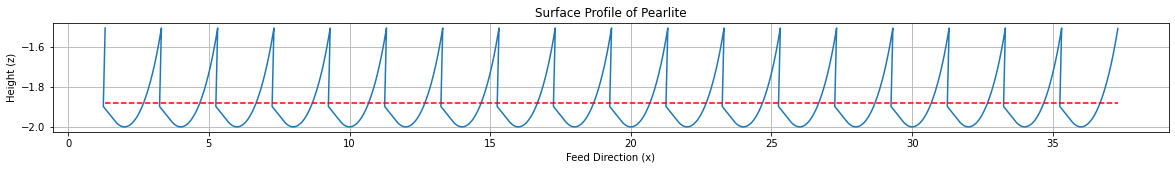

0.108

In [256]:
r = 2               ## Cutting Edge Radius
E = 10              ## End Cutting Edge angle
feed = 2            ## Feed/rev-flute
MCT_ratio = 0.20    ## Minimum Chip Thickness
SurfaceX, SurfaceY = SurfaceGenerator(r,E,feed,MCT_ratio)
RaGenerator(SurfaceX, SurfaceY, mct, True)

# Part F

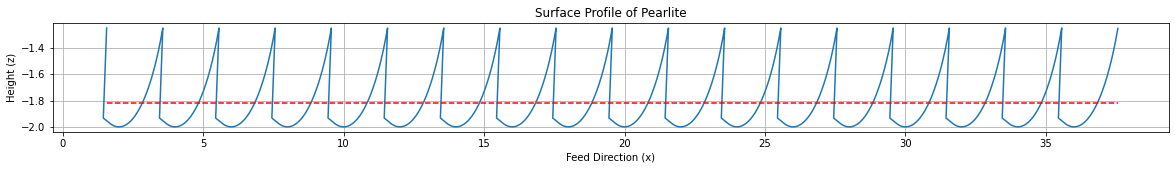

0.173

In [257]:
r = 2               # Cutting Edge Radius for tool 1 = 2
E = 10              # End Cutting Edge Angle
feed = 2            # Feed/rev-flute
MCT_ratio = 0.35    # Minimum Chip Thickness for Ferrite = 0.35, Perlite = 0.20
SurfaceX, SurfaceY = SurfaceGenerator(r,E,feed,MCT_ratio)
RaGenerator(SurfaceX, SurfaceY, mct, True)

# Part H

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]
Error points [0, 1, 2, 4]


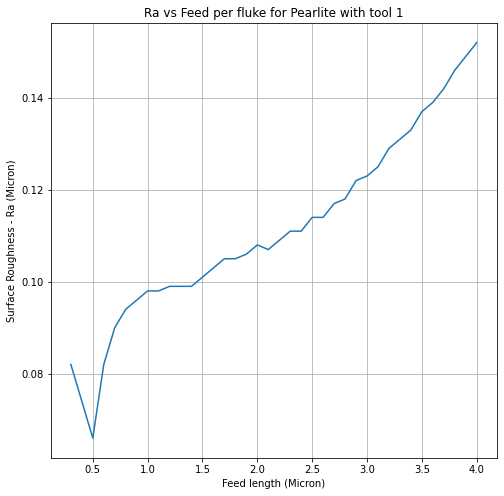

In [260]:
r = 2               # Cutting Edge Radius for tool 1 = 2 Micron and tool 2 = 5 Micron
E = 10              # End Cutting Edge angle
mctRatio = 0.20     # Minimum Chip Thickness for Ferrite = 0.35, Perlite = 0.20
feeds = np.linspace(0, 0.1*40, 41)

if mctRatio == 0.35:
    material = 'Ferrite'
elif mctRatio == 0.20:
    material = 'Pearlite'

Ras = []
err= []
for p in range(len(feeds)):
    try:
        SurfaceX, SurfaceY = SurfaceGenerator(r,E,feeds[p],mctRatio)
        Ras += [RaGenerator(SurfaceX, SurfaceY, mctRatio,False)]
    except:
        err += [p]       
        pass
    # print(p)
print('Error points',err)
# print(Ras)
if r == 2:
    tool = 'tool 1'
if r == 5:
    tool = 'tool 2'
feeds = np.delete(feeds, err)

figsize = [8,8]
xlabel = 'Feed length (Micron)'
ylabel = 'Surface Roughness - Ra (Micron)'
title = 'Ra vs Feed per fluke for '+material+' with '+tool
plotGenerator(1,feeds,Ras,0,0,title,xlabel,ylabel,figsize)

In [245]:
r = 2               ## Tool 1: 2 , Tool 2: 5 ## Cutting Edge Radius
E = 10              ## End Cutting Edge angle
mct = 0.20
theta = (180-E)*np.pi/180
t0 = mct*r
x0 = 0
g = x0 - r*np.sin(theta)
X = np.round(np.linspace(g, x0+r, 1000),5)